<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#2.2" data-toc-modified-id="2.2-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>2.2</a></span><ul class="toc-item"><li><span><a href="#Box-Ljung-test" data-toc-modified-id="Box-Ljung-test-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Box-Ljung test</a></span></li></ul></li><li><span><a href="#2.4" data-toc-modified-id="2.4-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2.4</a></span><ul class="toc-item"><li><span><a href="#AR(3)" data-toc-modified-id="AR(3)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>AR(3)</a></span></li><li><span><a href="#AIC" data-toc-modified-id="AIC-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>AIC</a></span></li><li><span><a href="#AR(3)-example" data-toc-modified-id="AR(3)-example-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>AR(3) example</a></span></li><li><span><a href="#Model-checking" data-toc-modified-id="Model-checking-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Model checking</a></span></li></ul></li><li><span><a href="#2.7" data-toc-modified-id="2.7-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>2.7</a></span><ul class="toc-item"><li><span><a href="#3M-log-price" data-toc-modified-id="3M-log-price-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>3M log price</a></span></li><li><span><a href="#Unit-root-test-(U.S.-quarterly-GDP)" data-toc-modified-id="Unit-root-test-(U.S.-quarterly-GDP)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Unit root test (U.S. quarterly GDP)</a></span></li><li><span><a href="#Unit-root-test-(S&amp;P-500)" data-toc-modified-id="Unit-root-test-(S&amp;P-500)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Unit root test (S&amp;P 500)</a></span></li></ul></li></ul></div>

# 2.2

## Box-Ljung test

In [3]:
da = read.table("../AFTS_data/Ch02/m-ibm3dx2608.txt", header=T)
da[1:5,]

,date,ibmrtn,vwrtn,ewrtn,sprtn
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,19260130,-0.010381,0.000724,0.023174,0.022472
2,19260227,-0.024476,-0.033374,-0.053510,-0.043956
3,19260331,-0.115591,-0.064341,-0.096824,-0.059113
4,19260430,0.089783,0.038358,0.032946,0.022688
5,19260528,0.036932,0.012172,0.001035,0.007679


In [4]:
Box.test(da$ibmrtn, lag = 5, type = 'Ljung')


	Box-Ljung test

data:  da$ibmrtn
X-squared = 3.3682, df = 5, p-value = 0.6434


In [5]:
libm = log(da$ibmrtn+1)
Box.test(libm, lag = 5, type = 'Ljung')


	Box-Ljung test

data:  libm
X-squared = 3.5236, df = 5, p-value = 0.6198


# 2.4

## AR(3)

In [21]:
?points

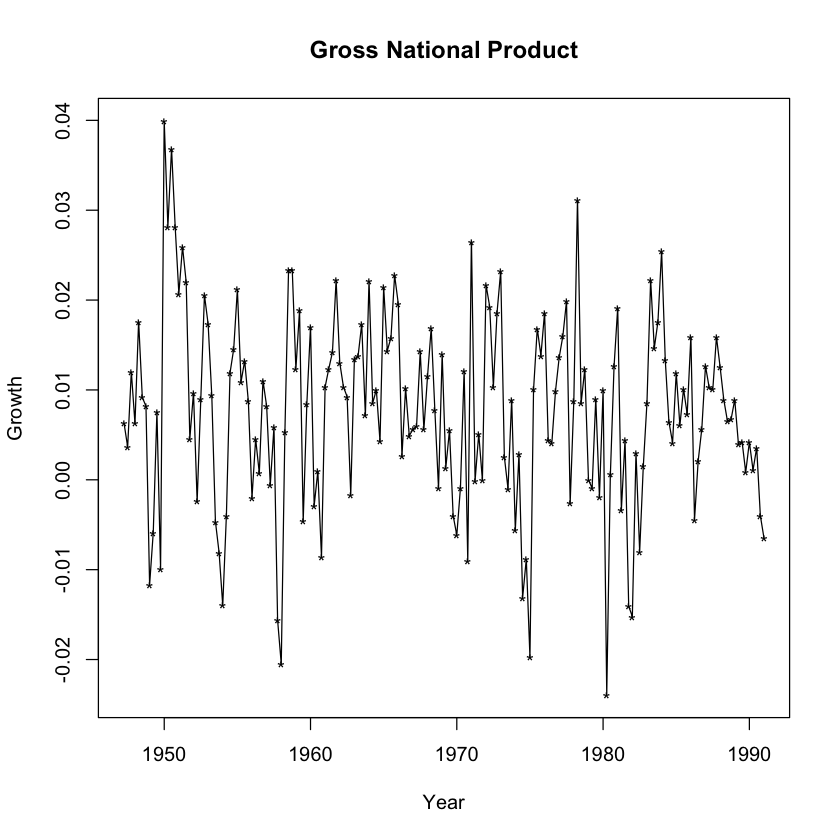

In [26]:
gnp = scan(file = "../AFTS_data/Ch02/dgnp82.txt")
gnp1 = ts(gnp, frequency = 4, start = c(1947, 2))
par(bg = "white")
plot(gnp1, type = 'l', main = "Gross National Product", xlab = "Year", ylab = "Growth")
points(gnp1, pch = '*')

- Find the AR order using AIC

In [27]:
m1 = ar(gnp, method = 'mle')
m1$order

[1] 3

In [28]:
m2 = arima(gnp, order = c(3, 0, 0))
m2


Call:
arima(x = gnp, order = c(3, 0, 0))

Coefficients:
         ar1     ar2      ar3  intercept
      0.3480  0.1793  -0.1423     0.0077
s.e.  0.0745  0.0778   0.0745     0.0012

sigma^2 estimated as 9.427e-05:  log likelihood = 565.84,  aic = -1121.68

- $\phi_0 = \mu*(1-\phi_1-\phi_2-\phi_3)$

In [104]:
cal_phi_0 <- function(arima_md, ord, digits=6) {
    print(format(
        as.numeric((1-sum(arima_md$coef[1:ord]))*arima_md$coef['intercept']),
        digits = digits
    ))
}

In [105]:
cal_phi_0(m2, ord=3)

[1] "0.00472311"


Residual standar error

In [52]:
sqrt(m2$sigma2)

[1] 0.009709322

- Characteristic equation

In [57]:
?polyroot

In [53]:
p1 = c(1, -m2$coef[1:3])
roots = polyroot(p1)
roots

[1]  1.590253+1.063882i -1.920152-0.000000i  1.590253-1.063882i

In [71]:
for (i in 1:3) {
    print(i)
    print(as.numeric(Mod(1-m2$coef[1]*roots[i]-m2$coef[2]*roots[i]^2-m2$coef[3]*roots[i]^3)))
}

[1] 1
[1] 2.237726e-16
[1] 2
[1] 4.641385e-16
[1] 3
[1] 2.237726e-16


- Absolute values of the solutions

In [77]:
roots; Mod(roots)

[1]  1.590253+1.063882i -1.920152-0.000000i  1.590253-1.063882i

[1] 1.913308 1.920152 1.913308

In [76]:
1/roots; Mod(1/roots)

[1]  0.4344065-0.2906186i -0.5207921+0.0000000i  0.4344065+0.2906186i

[1] 0.5226550 0.5207921 0.5226550

- Compute the average length of business cycles
- Doesn't matter if using the characteristic roots or the inverse of them.

In [80]:
k = 2*pi/acos(0.434406493995099/0.522654950320849)
k

[1] 10.65638

In [81]:
k = 2*pi/acos(1.59025281352281/1.91330819575347)
k

[1] 10.65638

## AIC

In [84]:
gnp = scan(file = '../AFTS_data/Ch02/dgnp82.txt')
ord = ar(gnp, method = 'mle')
format(ord$aic, digits = 6)

0           1           2           3           4           5 
"27.846690" " 2.741632" " 1.603242" " 0.000000" " 0.302785" " 2.242661" 
          6           7           8           9          10          11 
" 4.052084" " 6.025475" " 5.904668" " 7.571863" " 7.895334" " 9.678873" 
         12 
" 7.197545"

In [86]:
ord$order; ord$order.max

[1] 3

[1] 12

## AR(3) example

In [87]:
da = read.table("../AFTS_data/Ch02/m-ibm3dx2608.txt", header = T)
da[1:5,]

,date,ibmrtn,vwrtn,ewrtn,sprtn
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,19260130,-0.010381,0.000724,0.023174,0.022472
2,19260227,-0.024476,-0.033374,-0.053510,-0.043956
3,19260331,-0.115591,-0.064341,-0.096824,-0.059113
4,19260430,0.089783,0.038358,0.032946,0.022688
5,19260528,0.036932,0.012172,0.001035,0.007679


In [90]:
vw = da$vwrtn # Value-weighted index
t1 = prod(vw+1) # Simple gross return
t1; length(vw); t1^(12/length(vw))-1 # monthly return per annum

[1] 1592.953

[1] 996

[1] 0.09290084

## Model checking

In [91]:
m3 = arima(da$vwrtn, order = c(3, 0, 0))
m3


Call:
arima(x = da$vwrtn, order = c(3, 0, 0))

Coefficients:
         ar1      ar2      ar3  intercept
      0.1158  -0.0187  -0.1042     0.0089
s.e.  0.0315   0.0317   0.0317     0.0017

sigma^2 estimated as 0.002875:  log likelihood = 1500.86,  aic = -2991.73

- Compute the intercept $\phi_0 = \mu*(1-\phi_1-\phi_2-\phi_3)$

In [106]:
cal_phi_0(m3, ord=3)

[1] "0.00901194"


- Compute the standard error of residuals

In [111]:
attributes(m3)

$names
 [1] "coef"      "sigma2"    "var.coef"  "mask"      "loglik"    "aic"      
 [7] "arma"      "residuals" "call"      "series"    "code"      "n.cond"   
[13] "nobs"      "model"    

$class
[1] "Arima"

In [119]:
c(
    sqrt(sum(m3$residuals^2)/(m3$nobs-2*length(m3$coef)-1)),
    sqrt(sum(m3$residuals^2)/(m3$nobs-length(m3$coef))),
    sqrt(sum(m3$residuals^2)/m3$nobs)
)

[1] 0.05386281 0.05372689 0.05361890

In [109]:
sqrt(m3$sigma2)

[1] 0.0536189

- Ljung-Box test (R uses 12 dof)

In [121]:
Box.test(m3$residuals, lag = 12, type = 'Ljung')


	Box-Ljung test

data:  m3$residuals
X-squared = 16.352, df = 12, p-value = 0.1756


- Compute p-value using 9 dof

In [122]:
pv = 1-pchisq(16.35,9)
pv

[1] 0.05992276

- Fix the AR(2) coef to zero

In [124]:
mm3 = arima(da$vwrtn, order = c(3,0,0), fixed = c(NA,0,NA,NA))
mm3

Warning message in arima(da$vwrtn, order = c(3, 0, 0), fixed = c(NA, 0, NA, NA)):
“some AR parameters were fixed: setting transform.pars = FALSE”



Call:
arima(x = da$vwrtn, order = c(3, 0, 0), fixed = c(NA, 0, NA, NA))

Coefficients:
         ar1  ar2      ar3  intercept
      0.1136    0  -0.1063     0.0089
s.e.  0.0313    0   0.0315     0.0017

sigma^2 estimated as 0.002876:  log likelihood = 1500.69,  aic = -2993.38

In [126]:
cal_phi_0(mm3, ord = 3)

[1] "0.00888153"


In [127]:
sqrt(mm3$sigma2)

[1] 0.05362832

In [129]:
box_test <- Box.test(mm3$residuals, lag = 12, type = 'Ljung')
box_test


	Box-Ljung test

data:  mm3$residuals
X-squared = 16.828, df = 12, p-value = 0.1562


In [130]:
attributes(box_test)

$names
[1] "statistic" "parameter" "p.value"   "method"    "data.name"

$class
[1] "htest"

In [135]:
pv = as.numeric(1-pchisq(box_test$statistic, 10))
pv; box_test$statistic

[1] 0.0782661

X-squared 
 16.82763

# 2.7

## 3M log price

In [136]:
da = read.table("../AFTS_data/Ch02/m-3m4608.txt", header = T)
da[1:5,]

,date,rtn
,<int>,<dbl>
1,19460228,-0.077922
2,19460330,0.018592
3,19460430,-0.100000
4,19460531,0.209877
5,19460628,0.005128


- See the t-statistics and p-value of mean of log returns

In [151]:
lrtn = log(1+da$rtn)
t_stats = mean(lrtn)/(sd(lrtn)/sqrt(length(lrtn)))
pv = 2*(1-pnorm(abs(t_stats)))
mean(lrtn); 
sd(lrtn); 
sd(lrtn)/sqrt(length(lrtn)); # variance of the mean of the log returns
t_stats; 
pv

[1] 0.01029941

[1] 0.0637191

[1] 0.002318975

[1] 4.441363

[1] 8.939078e-06

- Construct two price series
    - Using log return
    - Using mean-corrected log return

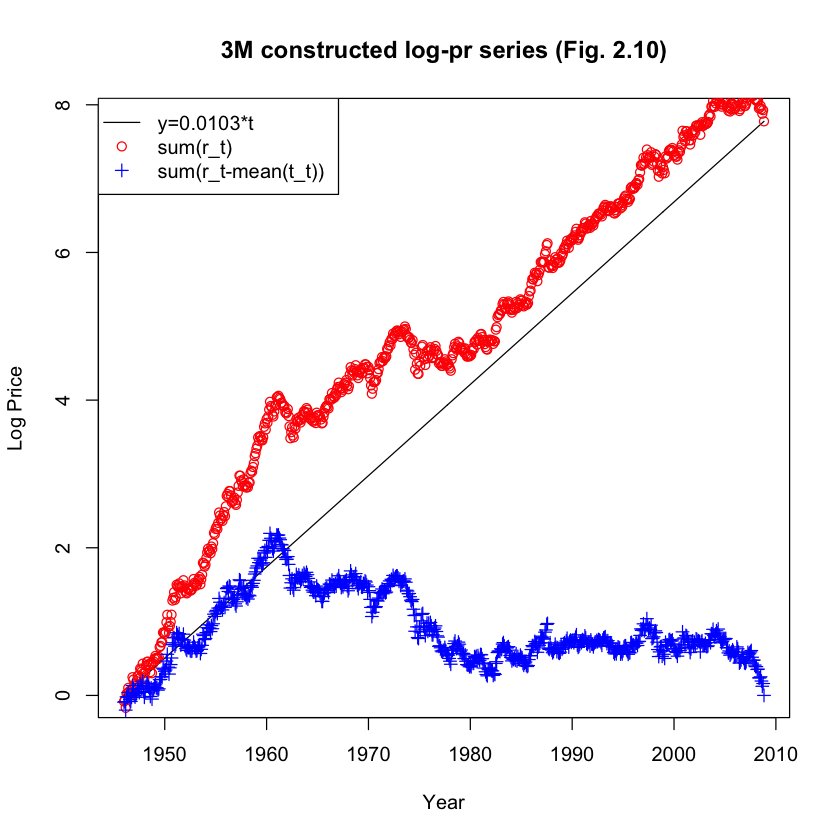

In [168]:
pt1 = cumsum(lrtn)
pt2 = cumsum(lrtn-mean(lrtn))
pt1_ts = ts(pt1, frequency = 12, start = c(1946, 1))
pt2_ts = ts(pt2, frequency = 12, start = c(1946, 1))
ln_ts = ts(mean(lrtn)*seq(from = 1, to = length(lrtn), by = 1), frequency = 12, start = c(1946, 1))
par(bg = "white")
plot(ln_ts, col = 'black', type = 'l', main = '3M constructed log-pr series (Fig. 2.10)', xlab = "Year", ylab = "Log Price")
# plot(pt1_ts, type = 'p', pch = 1, main = '3M constructed log-pr series', xlab = "Year", ylab = "Log Price")
points(pt1_ts, col = 'red', pch = 1)
points(pt2_ts, col = 'blue', pch = 3)
# Add legend
legend(
    "topleft", 
    legend = c("y=0.0103*t", "sum(r_t)", "sum(r_t-mean(t_t))"), 
    col = c("black", "red", "blue"), 
    lty = c(1, NA, NA),
    pch = c(NA, 1, 3)
)

## Unit root test (U.S. quarterly GDP)

In [170]:
install.packages("fUnitRoots")

also installing the dependency ‘urca’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [171]:
library(fUnitRoots)

In [173]:
da = read.table("../AFTS_data/Ch02/q-gdp4708.txt", header = T)
da[1:5,]

,year,mon,day,gdp
,<int>,<int>,<int>,<dbl>
1,1947,1,1,237.2
2,1947,4,1,240.5
3,1947,7,1,244.6
4,1947,10,1,254.4
5,1948,1,1,260.4


In [175]:
lgdp = log(da$gdp)
m1 = ar(diff(lgdp), method = 'mle')
m1$order

[1] 10

In [176]:
adfTest(lgdp, lags = 10, type = c("c"))


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 10
  STATISTIC:
    Dickey-Fuller: -1.6109
  P VALUE:
    0.4569 

Description:
 Wed Feb 14 03:37:31 2024 by user: 

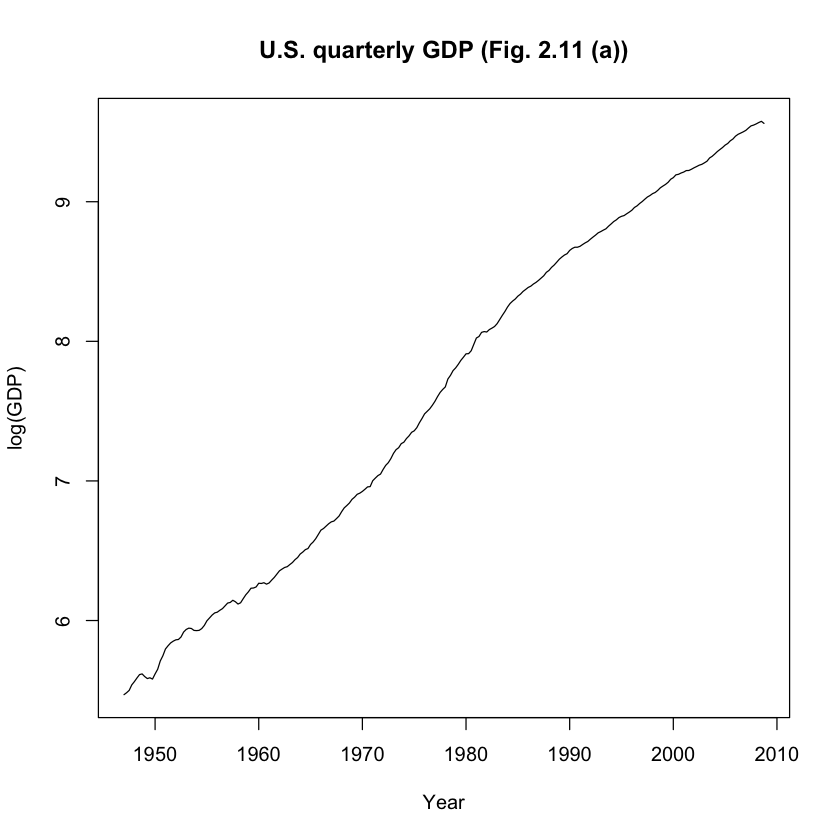

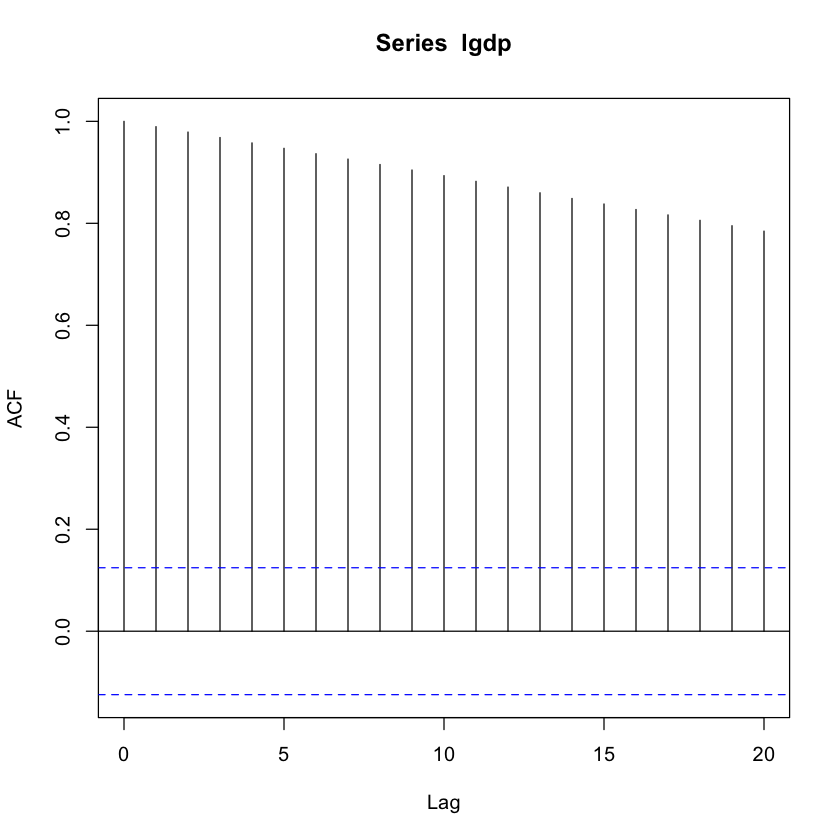

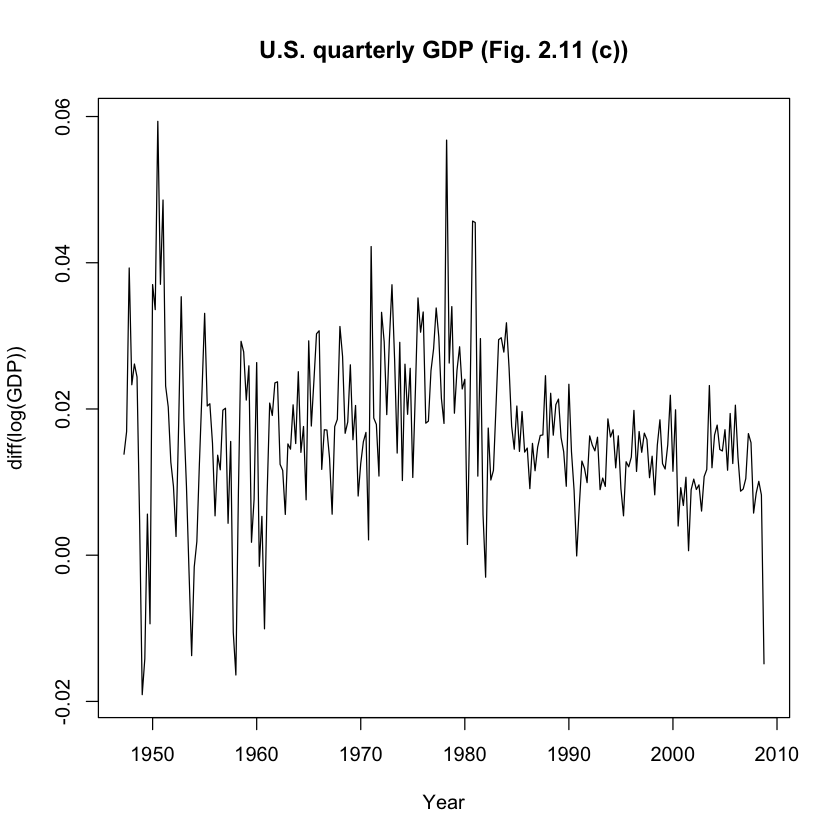

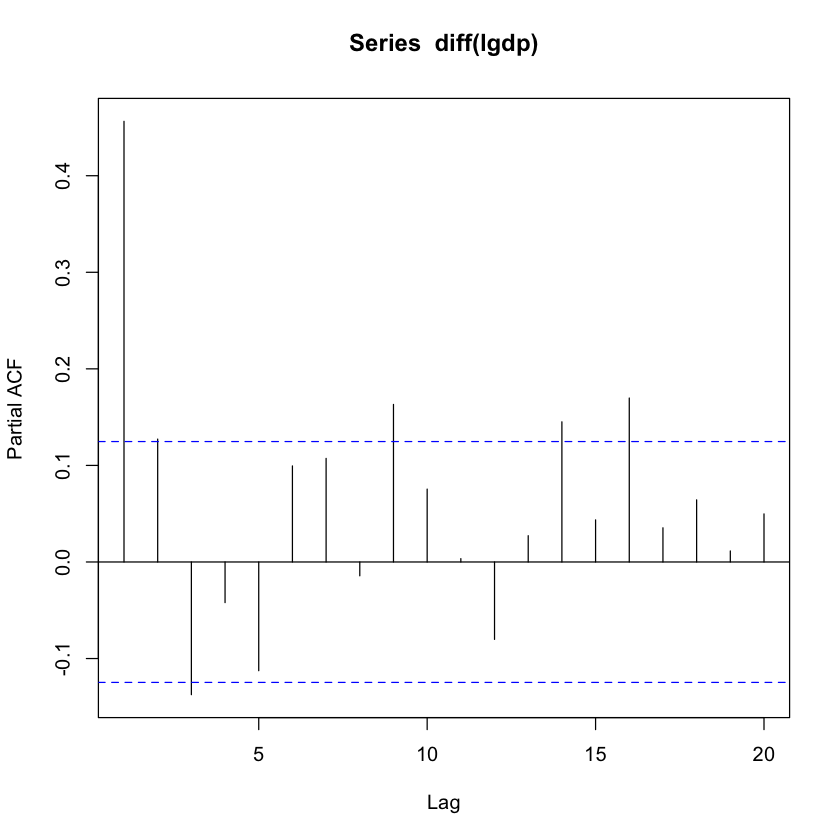

In [184]:
par(bg = "white")
lgdp_ts = ts(lgdp, frequency = 4, start = c(1947 ,1))
plot(lgdp_ts, col = 'black', type = 'l', main = 'U.S. quarterly GDP (Fig. 2.11 (a))', xlab = "Year", ylab = "log(GDP)")
acf(lgdp, lag.max = 20)
plot(diff(lgdp_ts), col = 'black', type = 'l', main = 'U.S. quarterly GDP (Fig. 2.11 (c))', xlab = "Year", ylab = "diff(log(GDP))")
pacf(diff(lgdp), lag.max = 20)

## Unit root test (S&P 500)

In [191]:
install.packages("bizdays")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [207]:
install.packages("RQuantLib")

also installing the dependencies ‘Rcpp’, ‘zoo’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [208]:
library(bizdays, RQuantLib)
print(packageVersion("bizdays"))
print(packageVersion("RQuantLib"))

[1] ‘1.0.16’
[1] ‘0.4.21’


In [209]:
load_quantlib_calendars(ql_calendars = NULL, from = 1950, to = 2008, financial = TRUE)

Calendar QuantLib/TARGET loaded

Calendar QuantLib/Argentina loaded

Calendar QuantLib/Australia loaded

Calendar QuantLib/Brazil loaded

Calendar QuantLib/Canada loaded

Calendar QuantLib/Canada/Settlement loaded

Calendar QuantLib/Canada/TSX loaded

Calendar QuantLib/China loaded

Calendar QuantLib/CzechRepublic loaded

Calendar QuantLib/Denmark loaded

Calendar QuantLib/Finland loaded

Calendar QuantLib/Germany loaded

Calendar QuantLib/Germany/FrankfurtStockExchange loaded

Calendar QuantLib/Germany/Settlement loaded

Calendar QuantLib/Germany/Xetra loaded

Calendar QuantLib/Germany/Eurex loaded

Calendar QuantLib/HongKong loaded

Calendar QuantLib/Hungary loaded

Calendar QuantLib/Iceland loaded

Calendar QuantLib/India loaded

Calendar QuantLib/Indonesia loaded

Calendar QuantLib/Italy loaded

Calendar QuantLib/Italy/Settlement loaded

Calendar QuantLib/Italy/Exchange loaded

Calendar QuantLib/Japan loaded

Calendar QuantLib/Mexico loaded

Calendar QuantLib/NewZealand loaded

Cal

In [185]:
da = read.table("../AFTS_data/Ch02/d-sp55008.txt", header = T)
da[1:10,]; dim(da)

,year,mon,day,open,high,low,close,volume,adjclose
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1950,1,3,16.66,16.66,16.66,16.66,1260000,16.66
2,1950,1,4,16.85,16.85,16.85,16.85,1890000,16.85
3,1950,1,5,16.93,16.93,16.93,16.93,2550000,16.93
4,1950,1,6,16.98,16.98,16.98,16.98,2010000,16.98
5,1950,1,9,17.08,17.08,17.08,17.08,2520000,17.08
6,1950,1,10,17.03,17.03,17.03,17.03,2160000,17.03
7,1950,1,11,17.09,17.09,17.09,17.09,2630000,17.09
8,1950,1,12,16.76,16.76,16.76,16.76,2970000,16.76
9,1950,1,13,16.67,16.67,16.67,16.67,3330000,16.67


[1] 14662     9

In [193]:
length(lsp5)

[1] 14662

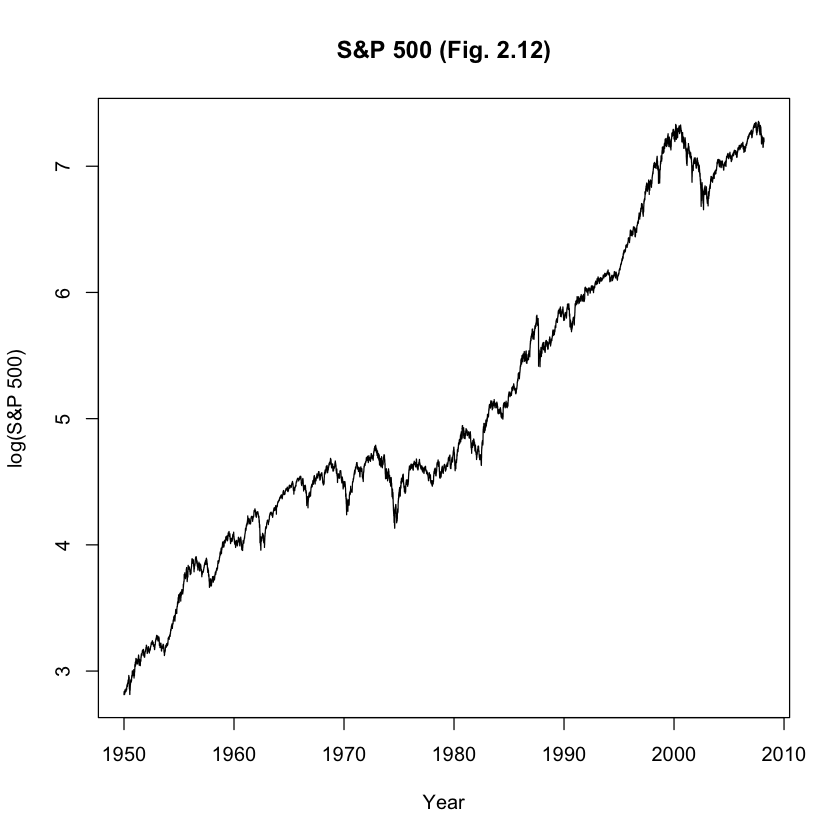

In [218]:
lsp5 = log(da$close)
par(bg = "white")
lsp5_ts = ts(lsp5, frequency = 252, start = c(1950 , 1, 3))
plot(lsp5_ts, col = 'black', type = 'l', main = 'S&P 500 (Fig. 2.12)', xlab = "Year", ylab = "log(S&P 500)")

In [186]:
m2 = ar(diff(lsp5), method = 'mle')
m2$order

[1] 2

In [187]:
adfTest(lsp5, lags = 2, type = ("ct"))


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 2
  STATISTIC:
    Dickey-Fuller: -2.0179
  P VALUE:
    0.5708 

Description:
 Wed Feb 14 03:51:59 2024 by user: 

In [188]:
adfTest(lsp5, lags = 15, type = ("ct"))


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 15
  STATISTIC:
    Dickey-Fuller: -1.9946
  P VALUE:
    0.5807 

Description:
 Wed Feb 14 03:52:33 2024 by user: 